# Identify unique images
I went through and identified that most of the training images were extremely similar to each other. I'll need to come up with another way to get enough instances of the different tag types showing all the variation.

In [1]:
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.13 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.3.0
OS Darwin 16.5.0 x86_64 i386 64bit
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.0
pandas 0.19.2
Fri Apr 28 17:20:28 2017 AEST

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import glob

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

In [4]:
list_image_directory_paths = glob.glob('/Users/jacksimpson/Data/beeunique/output/Classified/*/')

class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    class_images_dict[image_class_name] = []
    
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        class_images_dict[image_class_name].append(image)

In [5]:
{k: len(class_images_dict[k]) for k in class_images_dict.keys()}

{'Dot_3_Lines': 6168, 'j': 6182, 'Leaf': 5986, 'VV': 5517, 'BB': 5237, 'DD': 5132, 'Peace': 5342, 'Pillars': 5775, 'KK': 4903, 'HH': 5207, 'Ampersand': 5642, 'JJ': 5735, 'Power': 5703, '2_Note': 5275, 'Arrow_Hollow': 6237, 'Circle_Cross': 4395, 'Plant': 5649, 'Diamond': 5738, 'Hash': 5729, 'i': 6036, 'RR': 4904, 'Ankh': 5974, 'Question_Mark': 5665, 'TT': 4505, 'Trident': 5789, 'Asterisk': 5694, '1': 5581, '0': 5586, '3': 5875, '2': 5519, '3_Lines': 5491, '4': 5538, '7': 5399, '6': 5321, '5': 5672, 'Omega': 4326, 'AA': 5673, 'Circle_Line': 5711, 'Radioactive': 5822, '1_Note': 5731, 'EE': 5223, 'Circle_Half': 5088, 'PP': 10066, 'GG': 5583, 'XX': 5563, 'Plane': 5728, 'ZZ': 5431, '8': 5377, 'Necklace': 5971, 'Umbrella': 5414, 'Triangle': 6134, 'Dot': 5980, 'a': 5535, 'Heart': 5700, 'b': 5561, 'e': 5509, 'NN': 5731, 'g': 5479, 'f': 5382, 'UU': 5413, 'h': 5608, 'Arrow_Line': 5412, 'Queen': 8816, 'Tadpole': 5758, 'n': 5201, 'SS': 8329, 'r': 5441, 't': 5738, 'w': 5625, 'y': 5590, 'Scissors': 5

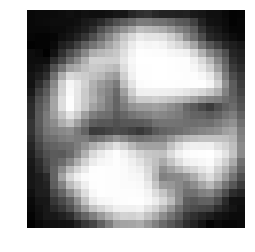

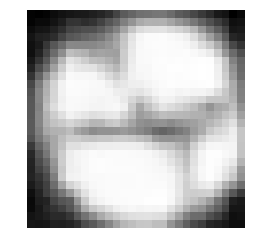

In [15]:
view(class_images_dict['XX'][0])
view(class_images_dict['XX'][1])

In [34]:
unique_class_images_dict = {}

for tag_class in class_images_dict.keys():
    print(tag_class)
    unique_class_images_dict[tag_class] = []
    too_similar_index = []
    for i, tag in enumerate(class_images_dict[tag_class]):
        if i not in too_similar_index:
            unique_class_images_dict[tag_class].append(tag)
            for ii, other_tag in enumerate(class_images_dict[tag_class]):
                if ii not in too_similar_index:
                    res = cv2.matchTemplate(tag, other_tag, cv2.TM_CCOEFF_NORMED)
                    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
                    if max_val > 0.95:
                        too_similar_index.append(ii)

Dot_3_Lines
RR
Queen
Leaf
ZZ
BB
DD
Peace
Pillars
HH
Ampersand
JJ
n
Arrow_Hollow
Circle_Cross
Plant
Diamond
Hash
NN
Ankh
Question_Mark
TT
Trident
Asterisk
UU
1
0
3
2
3_Lines
4
7
6
5
Omega
Umbrella
AA
SS
Circle_Line
Radioactive
w
Tadpole
EE
Circle_Half
PP
GG
XX
VV
8
Necklace
Triangle
Dot
a
Heart
b
e
Power
g
f
i
h
Arrow_Line
j
Plane
2_Note
KK
r
t
1_Note
y
Scissors
MM


In [35]:
{k: len(unique_class_images_dict[k]) for k in unique_class_images_dict.keys()}

{'0': 69,
 '1': 32,
 '1_Note': 22,
 '2': 31,
 '2_Note': 36,
 '3': 29,
 '3_Lines': 89,
 '4': 30,
 '5': 34,
 '6': 36,
 '7': 28,
 '8': 43,
 'AA': 39,
 'Ampersand': 55,
 'Ankh': 29,
 'Arrow_Hollow': 38,
 'Arrow_Line': 37,
 'Asterisk': 44,
 'BB': 71,
 'Circle_Cross': 119,
 'Circle_Half': 57,
 'Circle_Line': 82,
 'DD': 61,
 'Diamond': 28,
 'Dot': 67,
 'Dot_3_Lines': 34,
 'EE': 36,
 'GG': 56,
 'HH': 51,
 'Hash': 34,
 'Heart': 45,
 'JJ': 32,
 'KK': 50,
 'Leaf': 51,
 'MM': 53,
 'NN': 44,
 'Necklace': 28,
 'Omega': 58,
 'PP': 79,
 'Peace': 72,
 'Pillars': 49,
 'Plane': 41,
 'Plant': 30,
 'Power': 52,
 'Queen': 93,
 'Question_Mark': 30,
 'RR': 45,
 'Radioactive': 66,
 'SS': 107,
 'Scissors': 50,
 'TT': 27,
 'Tadpole': 42,
 'Triangle': 47,
 'Trident': 50,
 'UU': 42,
 'Umbrella': 35,
 'VV': 44,
 'XX': 43,
 'ZZ': 59,
 'a': 57,
 'b': 41,
 'e': 62,
 'f': 28,
 'g': 42,
 'h': 36,
 'i': 22,
 'j': 22,
 'n': 58,
 'r': 37,
 't': 35,
 'w': 34,
 'y': 25}

In [37]:
os.makedirs('tags')

for tag_class in unique_class_images_dict.keys():
    tag_class_dir = 'tags/{}'.format(tag_class)
    os.makedirs(tag_class_dir)
    tag_num = 0
    for tag in unique_class_images_dict[tag_class]:
        fname = tag_class_dir + '/' + str(tag_num) + '.png'
        tag_num += 1
        cv2.imwrite(fname, tag)

In [ ]:
x0 = class_images_dict['XX'][0]
view(x0)
d = 0
a = 0
for x in class_images_dict['XX'][1:]:
    res = cv2.matchTemplate(x0,x,cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    #print(max_val)
    if max_val > 0.98:
        d += 1
    else:
        a += 1
        #view(x)
        #break
print(d, a)